In [7]:
#importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.30, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
import time
from statistics import mean

classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'AdaBoost',  'DecisionTree', 
               'KNeighbors','GradientBoosting', 'XgBoost']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0),
          xgb.XGBClassifier()]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def prec_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    prec = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        prec.append(precision_score(Y_test,predictions))
        j = j+1     
    Score["Precision"] = prec
    Score.sort_values(by="Precision", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def rec_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    rec = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        rec.append(recall_score(Y_test,predictions))
        j = j+1     
    Score["Recall"] = rec
    Score.sort_values(by="Recall", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def f_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    f = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        f.append(f1_score(Y_test,predictions))
        j = j+1     
    Score["F1"] = f
    Score.sort_values(by="F1", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def ra_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    ra = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        ra.append(roc_auc_score(Y_test,predictions))
        j = j+1     
    Score["ROC_AUC"] = ra
    Score.sort_values(by="ROC_AUC", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5,6,7,8,9,10]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

In [8]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [9]:
#looking at dataset
data_bc = pd.read_csv(r'C:\Users\nprus\OneDrive\Desktop\Minor project work\Project Resources\Breast cancer_data.csv')
label_bc = data_bc["diagnosis"]
label_bc = np.where(label_bc == 'M',1,0)
data_bc.drop(["id","diagnosis","Unnamed: 32"],axis = 1,inplace = True)

print("Breast Cancer dataset:\n",data_bc.shape[0],"Records\n",data_bc.shape[1],"Features")

Breast Cancer dataset:
 569 Records
 30 Features


In [15]:
data_bc.dtypes #checking the types of datatype for every attribute

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [13]:
#checking if their are any missing values
display(data_bc.isnull().any())
##no missing data

radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_dimension_worst    False
dtype: boo

In [14]:
data_bc.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<AxesSubplot:title={'center':'radius_mean'}>,
        <AxesSubplot:title={'center':'texture_mean'}>,
        <AxesSubplot:title={'center':'perimeter_mean'}>,
        <AxesSubplot:title={'center':'area_mean'}>,
        <AxesSubplot:title={'center':'smoothness_mean'}>],
       [<AxesSubplot:title={'center':'compactness_mean'}>,
        <AxesSubplot:title={'center':'concavity_mean'}>,
        <AxesSubplot:title={'center':'concave points_mean'}>,
        <AxesSubplot:title={'center':'symmetry_mean'}>,
        <AxesSubplot:title={'center':'fractal_dimension_mean'}>],
       [<AxesSubplot:title={'center':'radius_se'}>,
        <AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>],
       [<AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>,
        <AxesSubplot:title={'center':'concav

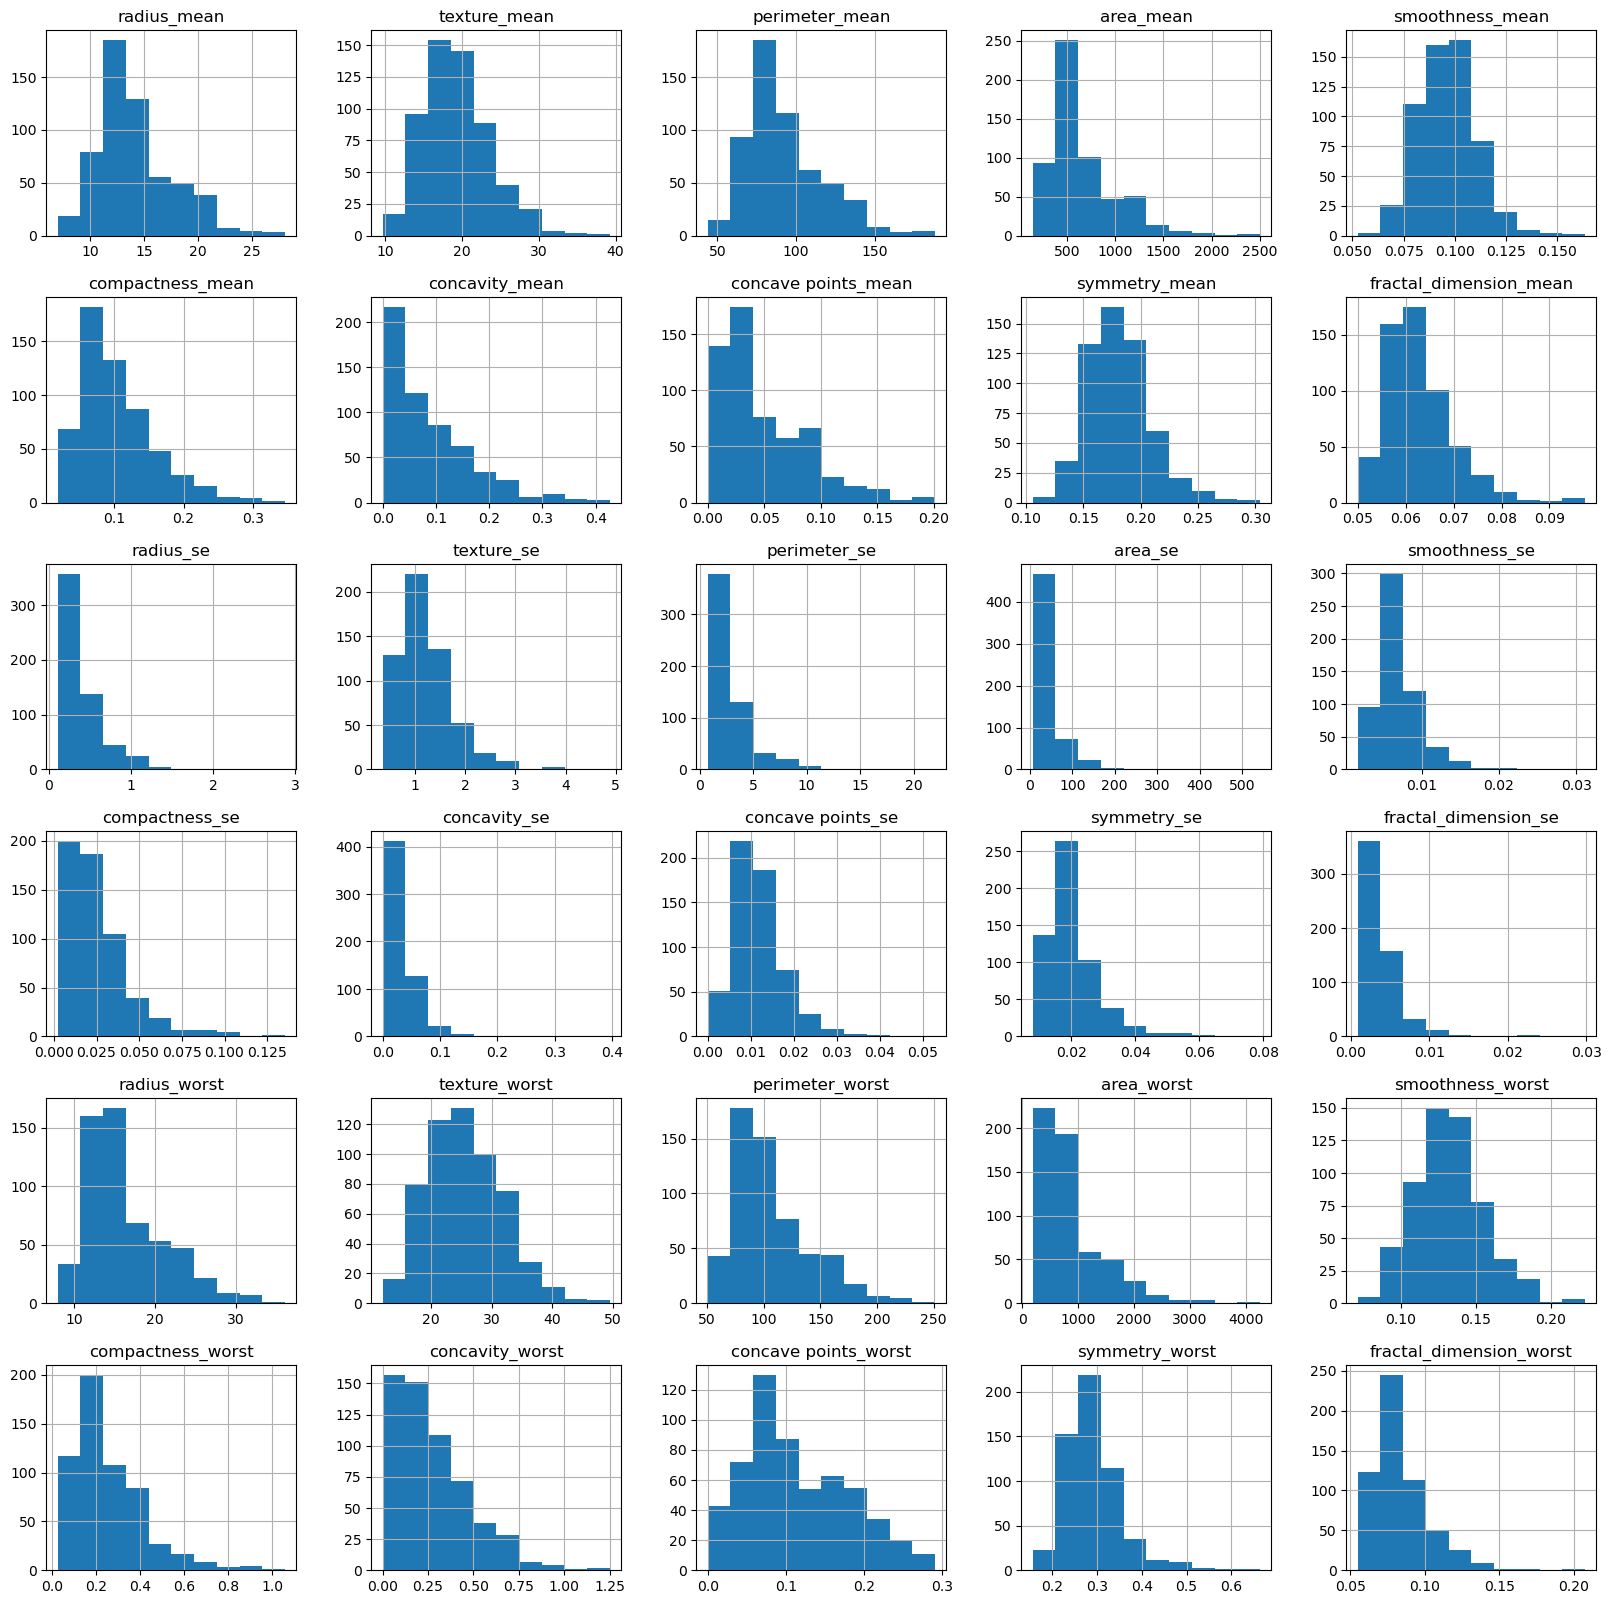

In [10]:
#visualizing our observational points
data_bc.hist(figsize=(20, 20))

In [11]:
display(data_bc.head())
print("All the features in this dataset have continuous values")

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


All the features in this dataset have continuous values


In [ ]:
#checking accuracy
score1 = acc_score(data_bc,label_bc)
score1

In [ ]:
#checking precision
score2 = prec_score(data_bc,label_bc)
score2

In [ ]:
#checking recall or sensitivity
score3 = rec_score(data_bc,label_bc)
score3

In [ ]:
#checking f-score
score4 = f_score(data_bc,label_bc)
score4

In [ ]:
#checking Roc_Auc score
score5 = ra_score(data_bc,label_bc)
score5

In [ ]:
#checking MCC
score6 = mcc_score(data_bc, label_bc)
score6

In [ ]:
#checking Roc_Auc curve for all thhe classifiers
X_train, X_test, y_train, y_test = split(data_bc,label_bc)

# logistic regression
model1 = LogisticRegression(max_iter = 1000)
# knn
model2 = KNeighborsClassifier(n_neighbors=4)
# Decision tree
model3 = DecisionTreeClassifier(random_state=0)
# Ada Boosting
model4 = AdaBoostClassifier(random_state = 0)
# Gradient Boosting
model5 = GradientBoostingClassifier(random_state=0)
# XG Boosting
model6 = xgb.XGBClassifier()

# fit model
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3.predict_proba(X_test)
pred_prob4 = model4.predict_proba(X_test)
pred_prob5 = model5.predict_proba(X_test)
pred_prob6 = model6.predict_proba(X_test)


from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Decision Tree')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='Ada Boost')
plt.plot(fpr5, tpr5, linestyle='--',color='olive', label='Gradient Boost')
plt.plot(fpr6, tpr6, linestyle='--',color='brown', label='XG Boost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:
#Visualization
plot(score_bc,0.96,1.0,c = "gold")

In [ ]:
#Checking training time for all the classifiers
X_train,X_test,Y_train,Y_test = split(data_bc,label_bc)
model = RandomForestClassifier(n_estimators=200, random_state=0)
t0 = time.time()
model.fit(X_train,Y_train)
print("Training time of Random Forest:", round(time.time()-t0,3), "sec")
model = LogisticRegression(max_iter = 1000)
t1 = time.time()
model.fit(X_train,Y_train)
print("Training time of Logistic Regression:", round(time.time()-t1,3), "sec")
model = AdaBoostClassifier(random_state = 0)
t2 = time.time()
model.fit(X_train,Y_train)
print("Training time of Ada Boost:", round(time.time()-t2,3), "sec")
model = KNeighborsClassifier()
t3 = time.time()
model.fit(X_train,Y_train)
print("Training time of KNeighbors:", round(time.time()-t3,3), "sec")
model = GradientBoostingClassifier(random_state=0)
t4 = time.time()
model.fit(X_train,Y_train)
print("Training time of Gradient Boost:", round(time.time()-t4,3), "sec")
model = xgb.XGBClassifier()
t5 = time.time()
model.fit(X_train,Y_train)
print("Training time of XG Boost:", round(time.time()-t5,3), "sec")
model = DecisionTreeClassifier(random_state=0)
t6 = time.time()
model.fit(X_train,Y_train)
print("Training time of Decision Tree:", round(time.time()-t6,3), "sec")
model = svm.SVC(kernel='linear')
t7 = time.time()
model.fit(X_train,Y_train)
print("Training time of Linear SVM:", round(time.time()-t7,3), "sec")
model = svm.SVC(kernel='rbf')
t8 = time.time()
model.fit(X_train,Y_train)
print("Training time of Radial SVM:", round(time.time()-t8,3), "sec")

In [ ]:
#Applying Genetic Algorithm with all the Classifiers and then evaluating the mean of 10 best generation score

In [ ]:
logmodel = xgb.XGBClassifier()
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=10,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)
print("The mean of 10 Generations is: ",mean(score_bc))

In [ ]:
logmodel = AdaBoostClassifier(random_state = 0)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=10,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)
print("The mean of 10 Generations is: ",mean(score_bc))

In [ ]:
logmodel = svm.SVC(kernel='linear')
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=10,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)
print("The mean of 10 Generations is: ",mean(score_bc))

In [ ]:
logmodel = LogisticRegression(max_iter = 1000)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=10,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)
print("The mean of 10 Generations is: ",mean(score_bc))

In [ ]:
logmodel = RandomForestClassifier(n_estimators=200, random_state=0)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=10,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)
print("The mean of 10 Generations is: ",mean(score_bc))

In [ ]:
logmodel = svm.SVC(kernel='rbf')
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=10,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)
print("The mean of 10 Generations is: ",mean(score_bc))

In [ ]:
logmodel = DecisionTreeClassifier(random_state=0)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=10,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)
print("The mean of 10 Generations is: ",mean(score_bc))

In [ ]:
logmodel = KNeighborsClassifier()
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=10,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)
print("The mean of 10 Generations is: ",mean(score_bc))

In [ ]:
logmodel = GradientBoostingClassifier(random_state=0)
X_train,X_test, Y_train, Y_test = split(data_bc,label_bc)
chromo_df_bc,score_bc=generations(data_bc,label_bc,size=80,n_feat=data_bc.shape[1],n_parents=64,mutation_rate=0.20,n_gen=10,
                         X_train = X_train,X_test = X_test,Y_train = Y_train,Y_test = Y_test)
print("The mean of 10 Generations is: ",mean(score_bc))

In [ ]:
#Computing confusion matrix for all the classifiers and then calculating the specificity

In [ ]:
X_train, X_test, y_train, y_test = split(data_bc,label_bc)

# compute the confusion matrix
model = xgb.XGBClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
                      
#Plotting the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#computing specificity
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity: ",specificity)

In [ ]:
X_train, X_test, y_train, y_test = split(data_bc,label_bc)

# compute the confusion matrix
model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
                      
#Plotting the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#computing specificity
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity: ",specificity)

In [ ]:
X_train, X_test, y_train, y_test = split(data_bc,label_bc)

# compute the confusion matrix
model = LogisticRegression(max_iter = 1000)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
                      
#Plotting the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#computing specificity
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity: ",specificity)

In [ ]:
X_train, X_test, y_train, y_test = split(data_bc,label_bc)

# compute the confusion matrix
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
                      
#Plotting the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#computing specificity
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity: ",specificity)

In [ ]:
X_train, X_test, y_train, y_test = split(data_bc,label_bc)

# compute the confusion matrix
model = svm.SVC(kernel='rbf')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
                      
#Plotting the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#computing specificity
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity: ",specificity)

In [ ]:
X_train, X_test, y_train, y_test = split(data_bc,label_bc)

# compute the confusion matrix
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
                      
#Plotting the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#computing specificity
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity: ",specificity)

In [ ]:
X_train, X_test, y_train, y_test = split(data_bc,label_bc)

# compute the confusion matrix
model = KNeighborsClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
                      
#Plotting the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#computing specificity
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity: ",specificity)

In [ ]:
X_train, X_test, y_train, y_test = split(data_bc,label_bc)

# compute the confusion matrix
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
                      
#Plotting the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#computing specificity
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity: ",specificity)

In [ ]:
X_train, X_test, y_train, y_test = split(data_bc,label_bc)

# compute the confusion matrix
model = AdaBoostClassifier(random_state = 0)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(y_test,predictions)
                      
#Plotting the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#computing specificity
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print("Specificity: ",specificity)